In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')
%matplotlib inline
from sklearn.svm import SVC

In [2]:
# load data
raw_data = pd.read_csv('Coding_Dojo.csv')
raw_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_data.index  = pd.to_datetime(raw_data['timestamp'].values, format='%d/%m/%Y')
raw_data.head(10)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_33,column_34,column_35,column_36,column_37,column_38,column_39,column_40,column_41,timestamp
1998-06-30,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,30/06/1998
1998-07-01,100.063852,100.023130,100.168052,100.143585,100.020144,100.072078,100.051591,100.019917,99.926170,100.368378,...,100.081080,100.062323,100.096021,100.157381,100.111776,100.147979,100.116238,100.070953,100.091812,01/07/1998
1998-07-02,100.107540,100.156511,100.409448,100.295993,100.040288,100.149412,100.121391,100.064729,99.952228,100.452813,...,100.193211,100.143590,100.134067,100.287830,100.252272,100.269504,100.270692,100.141906,100.201644,02/07/1998
1998-07-03,100.132745,100.185038,100.590317,100.206955,100.060433,100.175690,100.146427,100.089624,99.978285,100.332511,...,100.146387,100.104055,100.057975,100.239017,100.211133,100.253797,100.249196,100.122707,100.103825,03/07/1998
1998-07-06,100.242806,100.274473,100.610255,100.441182,100.508468,100.340118,100.233677,100.290449,100.056458,100.461780,...,100.448033,100.335227,100.252733,100.467093,100.475825,100.484446,100.493615,100.252926,100.443617,06/07/1998
1998-07-07,100.240286,100.339237,100.575363,100.308025,100.613356,100.379160,100.266300,100.253936,99.915747,100.564149,...,100.249893,100.194108,100.131349,100.309712,100.371811,100.351347,100.379765,100.180304,100.282302,07/07/1998
1998-07-08,100.243646,100.428672,100.441492,100.183692,100.710604,100.412947,100.264783,100.034024,99.941805,100.195771,...,100.041895,100.066716,100.068845,100.189362,100.210356,100.292652,100.237254,100.128550,100.197354,08/07/1998
1998-07-09,100.313380,100.406313,100.684312,100.522199,100.552229,100.521815,100.353550,100.029045,99.967862,100.646342,...,100.605756,100.522196,100.406729,100.681703,100.572852,100.682027,100.627369,100.404848,100.700177,09/07/1998
1998-07-10,100.328502,99.989977,101.013295,100.876750,100.572373,100.596896,100.364930,100.034854,99.993920,101.167900,...,100.569529,100.481562,100.452021,100.688436,100.616321,100.682853,100.675138,100.404848,100.628100,10/07/1998
1998-07-13,100.315060,100.057824,100.675055,100.489311,100.633500,100.693000,100.402106,100.009958,100.072092,100.539490,...,100.417474,100.401394,100.434810,100.555462,100.549566,100.570422,100.598707,100.385649,100.595494,13/07/1998


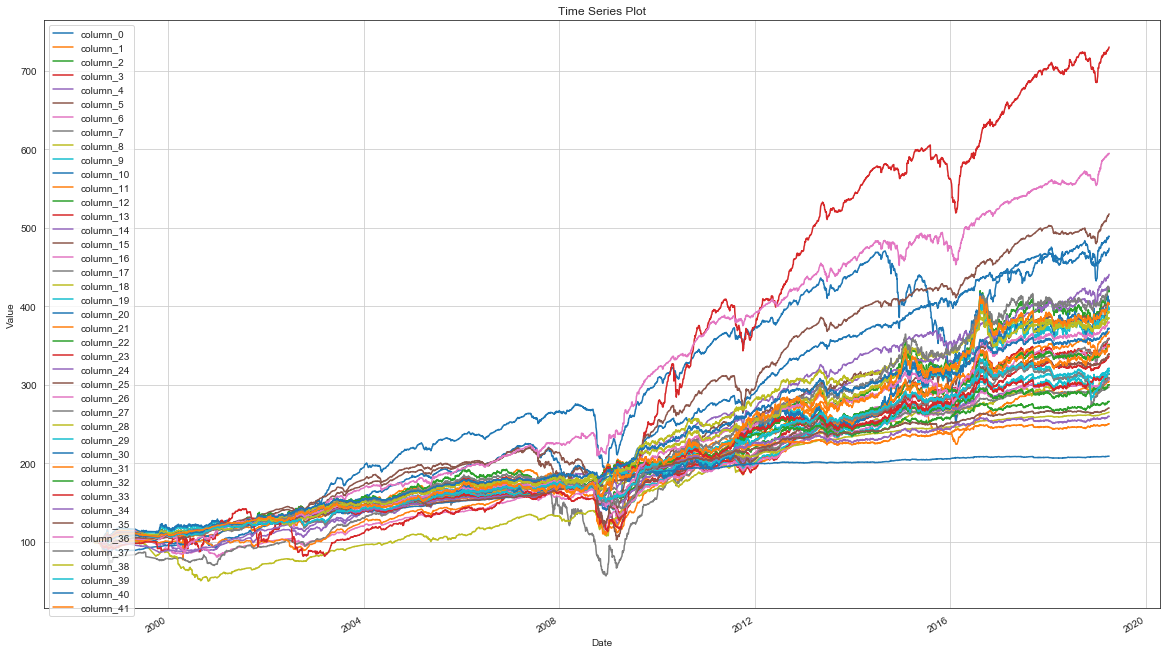

In [3]:
# plot a few columns
raw_data.plot( figsize=(20, 12), title='Time Series Plot')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [4]:
print('Top 5:')
columns = ['column_'+str(i) for i in range(42)]

top5_list = raw_data[columns].max().sort_values(ascending=False).head(5)
top5 = list(top5_list.index)
top5

Top 5:


['column_23', 'column_26', 'column_25', 'column_0', 'column_10']

In [5]:
columns

['column_0',
 'column_1',
 'column_2',
 'column_3',
 'column_4',
 'column_5',
 'column_6',
 'column_7',
 'column_8',
 'column_9',
 'column_10',
 'column_11',
 'column_12',
 'column_13',
 'column_14',
 'column_15',
 'column_16',
 'column_17',
 'column_18',
 'column_19',
 'column_20',
 'column_21',
 'column_22',
 'column_23',
 'column_24',
 'column_25',
 'column_26',
 'column_27',
 'column_28',
 'column_29',
 'column_30',
 'column_31',
 'column_32',
 'column_33',
 'column_34',
 'column_35',
 'column_36',
 'column_37',
 'column_38',
 'column_39',
 'column_40',
 'column_41']

In [6]:
print('Bottom 5:')
columns = ['column_'+str(i) for i in range(42)]
bot5_list = raw_data[columns].max().sort_values(ascending=False).tail(5)
bot5 = list(bot5_list.index)
bot5

Bottom 5:


['column_35', 'column_18', 'column_34', 'column_31', 'column_30']

### Plan
 - how to figure out maximum drawdown
 - top 5 in returns
 - bottom 5 in returns
 - correlation of them 
 - interest rate might be benchmark to be compared with(interest rate change))
 - Overlaying with SP500
 - Efficienet Frontier
 - Descriptive stats
 - Portfolio optimisation
 - AI first strategies over these bonds
 - Trading those bonds with cost ( Is it worth it to trade them or hold them) Strategy vs Asset buy and hold only 
 - SMA strategy 
 - Comparison with Industries/Sectors
 - TOP Bottom Regression analysis
 - Lagging Autocorrelation
 - Creating own index( if these are all bonds,
 

In [7]:
# Cell Markdown 

[]

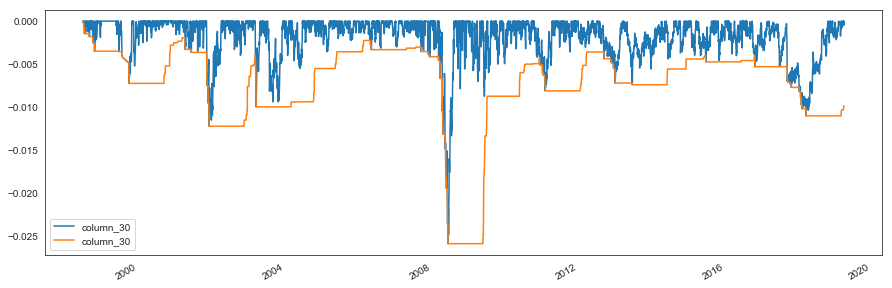

In [8]:
raw_data_30 =raw_data[["column_30"]]
roll_max_30 = raw_data_30.rolling(min_periods=1,window=250).max()
daily_drawdown_30 = raw_data_30/roll_max_30 - 1.0
max_daily_drawdown_30 = daily_drawdown_30.rolling(min_periods=1,window=250).min()


fig, ax = plt.subplots(figsize=(15,5))
daily_drawdown_30.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_30.plot(ax=ax, label='Max daily drawdown')
plt.plot()
#ax.legend()

[]

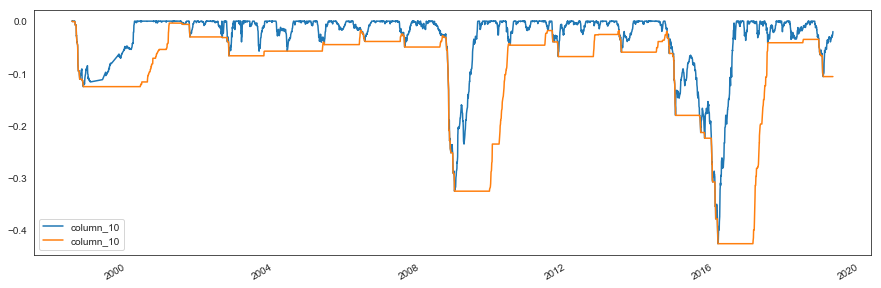

In [9]:
raw_data_10 =raw_data[["column_10"]]
roll_max_10 = raw_data_10.rolling(min_periods=1,window=250).max()
daily_drawdown_10 = raw_data_10/roll_max_10 - 1.0
max_daily_drawdown_10 = daily_drawdown_10.rolling(min_periods=1,window=250).min()

fig, ax = plt.subplots(figsize=(15,5))
daily_drawdown_10.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_10.plot(ax=ax, label='Max daily drawdown')
plt.plot()

[]

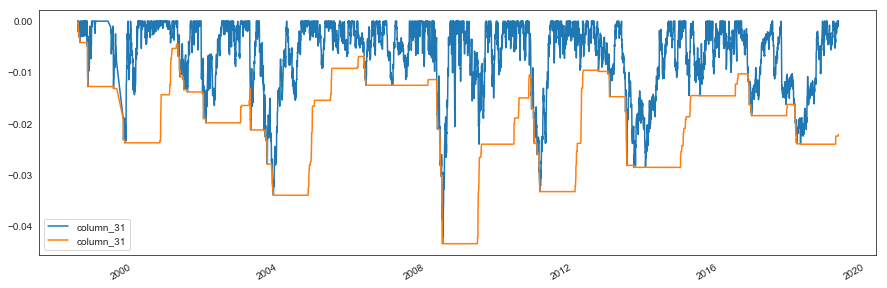

In [10]:
raw_data_31 =raw_data[["column_31"]]
roll_max_31 = raw_data_31.rolling(min_periods=1,window=250).max()
daily_drawdown_31 = raw_data_31/roll_max_31 - 1.0
max_daily_drawdown_31 = daily_drawdown_31.rolling(min_periods=1,window=250).min()


fig, ax = plt.subplots(figsize=(15,5))
daily_drawdown_31.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_31.plot(ax=ax, label='Max daily drawdown')
plt.plot()
#ax.legend()

[]

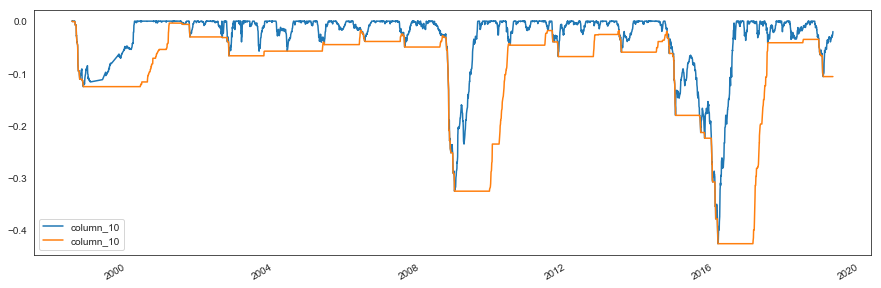

In [11]:

#DF['column_0'].plot()
#DF['column_25'].plot()

raw_data_10 =raw_data[["column_10"]]
roll_max_10 = raw_data_10.rolling(min_periods=1,window=250).max()
daily_drawdown_10 = raw_data_10/roll_max_10 - 1.0
max_daily_drawdown_10 = daily_drawdown_10.rolling(min_periods=1,window=250).min()

fig, ax = plt.subplots(figsize=(15,5))
daily_drawdown_10.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_10.plot(ax=ax, label='Max daily drawdown')
plt.plot()
#ax.legend()

[]

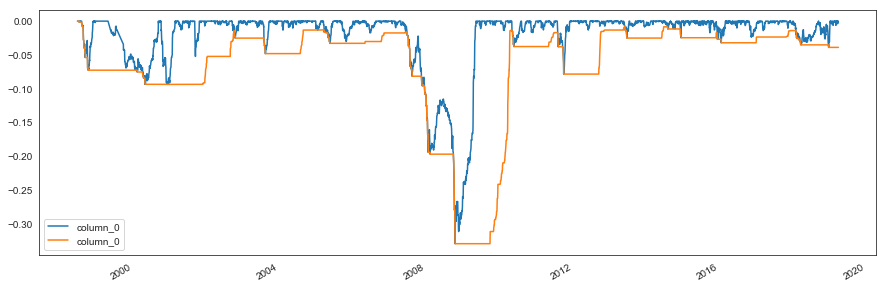

In [12]:
#DF['column_0'].plot()
raw_data_0 =raw_data[["column_0"]]
roll_max_0 = raw_data_0.rolling(min_periods=1,window=250).max()
daily_drawdown_0 = raw_data_0/roll_max_0 - 1.0
max_daily_drawdown_0 = daily_drawdown_0.rolling(min_periods=1,window=250).min()

fig, ax = plt.subplots(figsize=(15,5))
daily_drawdown_0.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_0.plot(ax=ax, label='Max daily drawdown')
plt.plot()
#ax.legend()

[]

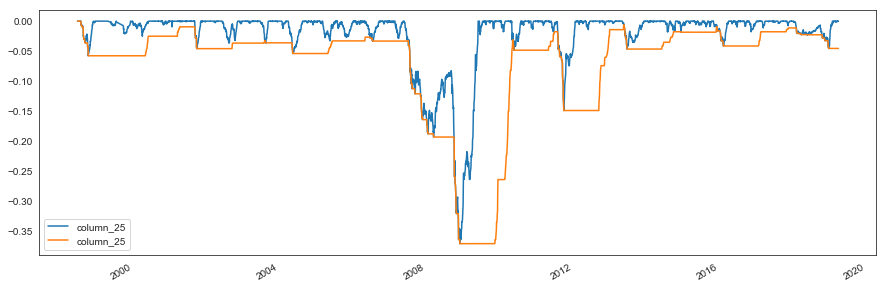

In [13]:
raw_data_25 =raw_data[["column_25"]]
roll_max_25 = raw_data_25.rolling(min_periods=1,window=250).max()
daily_drawdown_25 = raw_data_25/roll_max_25 - 1.0
max_daily_drawdown_25 = daily_drawdown_25.rolling(min_periods=1,window=250).min()

fig, ax = plt.subplots(figsize=(15,5))
daily_drawdown_25.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_25.plot(ax=ax, label='Max daily drawdown')
plt.plot()
#ax.legend()

In [14]:
DF = raw_data[top5+bot5]
Correlation_Matrix = DF.corr()
Correlation_Matrix
cols = Correlation_Matrix.copy()

#col = ['column_'+str(i) for i in range()]
#bot10_list = raw_data[columns].max().sort_values(ascending=False).tail(10)
#bot10 = list(bot10_list.index)
#bot10
TOP_BOT_10 = DF[0:0].copy()

In [15]:
COLS = list(TOP_BOT_10)
COLS

['column_23',
 'column_26',
 'column_25',
 'column_0',
 'column_10',
 'column_35',
 'column_18',
 'column_34',
 'column_31',
 'column_30']

In [16]:
Correlation_Matrix

,column_23,column_26,column_25,column_0,column_10,column_35,column_18,column_34,column_31,column_30
column_23,1.000000,0.981030,0.985853,0.978893,0.920937,0.958672,0.949536,0.937904,0.926515,0.862490
column_26,0.981030,1.000000,0.984744,0.986506,0.963701,0.992928,0.988562,0.984025,0.978848,0.940508
column_25,0.985853,0.984744,1.000000,0.996789,0.943367,0.973583,0.970011,0.952990,0.942852,0.889230
column_0,0.978893,0.986506,0.996789,1.000000,0.946821,0.978760,0.977787,0.961771,0.952487,0.904402
column_10,0.920937,0.963701,0.943367,0.946821,1.000000,0.967266,0.969375,0.959974,0.960059,0.949419
column_35,0.958672,0.992928,0.973583,0.978760,0.967266,1.000000,0.996787,0.995410,0.992458,0.965720
column_18,0.949536,0.988562,0.970011,0.977787,0.969375,0.996787,1.000000,0.993071,0.991391,0.970804
column_34,0.937904,0.984025,0.952990,0.961771,0.959974,0.995410,0.993071,1.000000,0.999023,0.979873
column_31,0.926515,0.978848,0.942852,0.952487,0.960059,0.992458,0.991391,0.999023,1.000000,0.987080
column_30,0.862490,0.940508,0.889230,0.904402,0.949419,0.965720,0.970804,0.979873,0.987080,1.000000


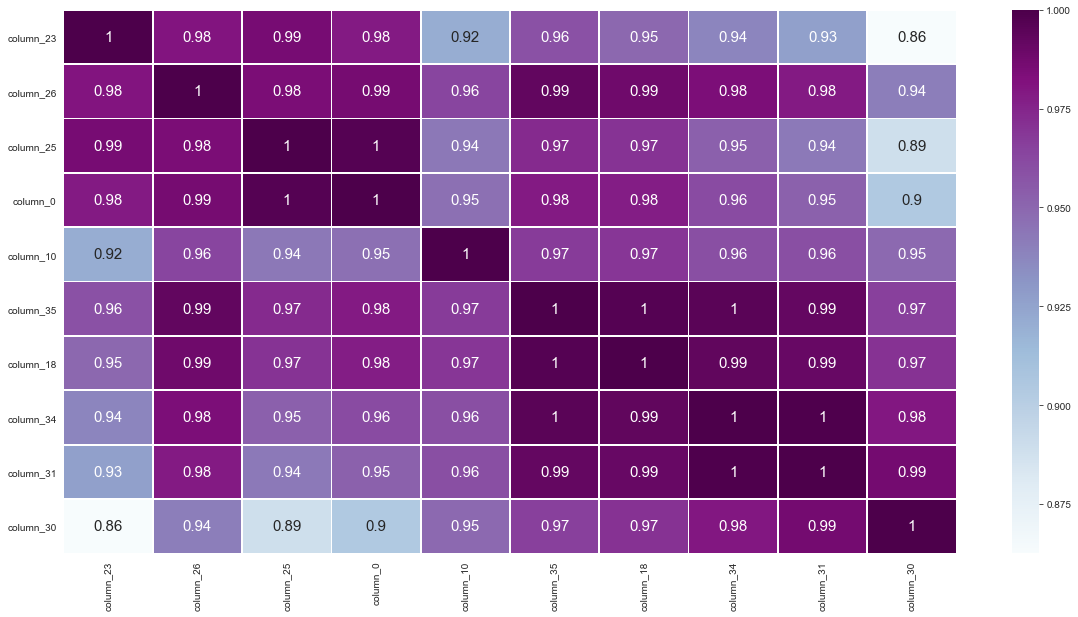

In [17]:
plt.subplots(figsize=(20,10)) 
# heatmap
sns.heatmap(Correlation_Matrix,
            annot=True,
            cmap="BuPu",
            linewidths=0.7,
            annot_kws={"size": 15})

# Plot aesthetics  
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [18]:
DF.head()

,column_23,column_26,column_25,column_0,column_10,column_35,column_18,column_34,column_31,column_30
1998-06-30,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1998-07-01,100.021541,100.020676,100.029966,100.063852,99.948764,100.096021,98.581680,100.062323,100.059106,100.033062
1998-07-02,99.911349,100.041352,100.242036,100.107540,100.027589,100.134067,98.573626,100.143590,100.130671,100.051464
1998-07-03,99.933719,100.062027,100.267392,100.132745,100.051236,100.057975,98.557518,100.104055,100.091267,100.033374
1998-07-06,100.083680,100.315651,100.381879,100.242806,100.096166,100.252733,98.678329,100.335227,100.296979,100.145347


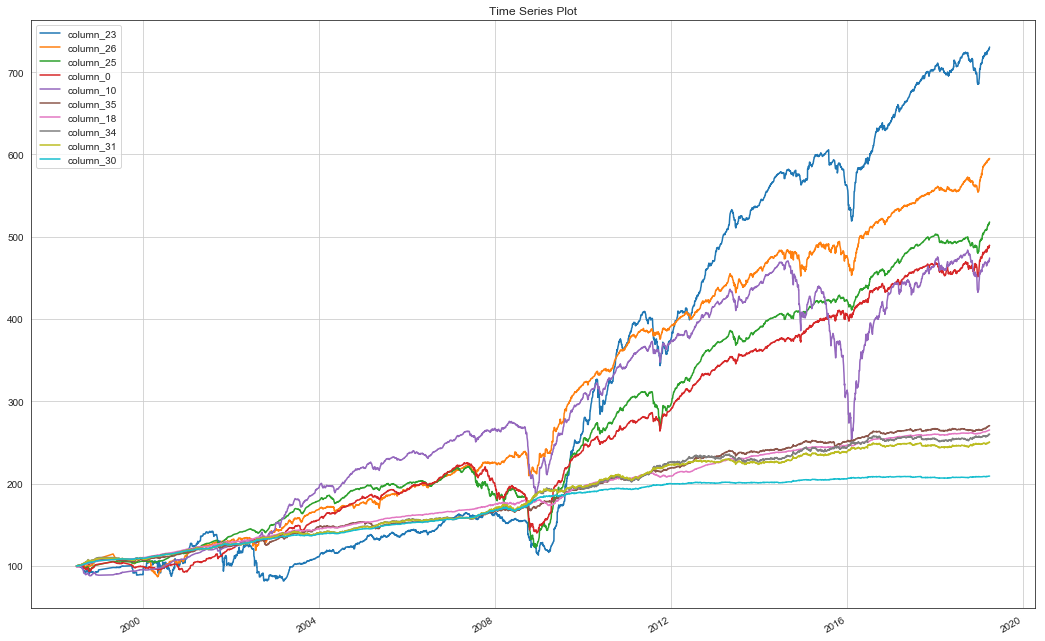

In [19]:
DF.plot( figsize=(18, 12), title='Time Series Plot')
plt.grid()

In [20]:
Data = DF.pct_change().dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025663450F60>,
      dtype=object)

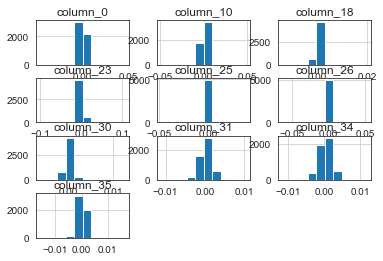

In [21]:

Data.hist()

In [22]:
CORR = Data.corr()

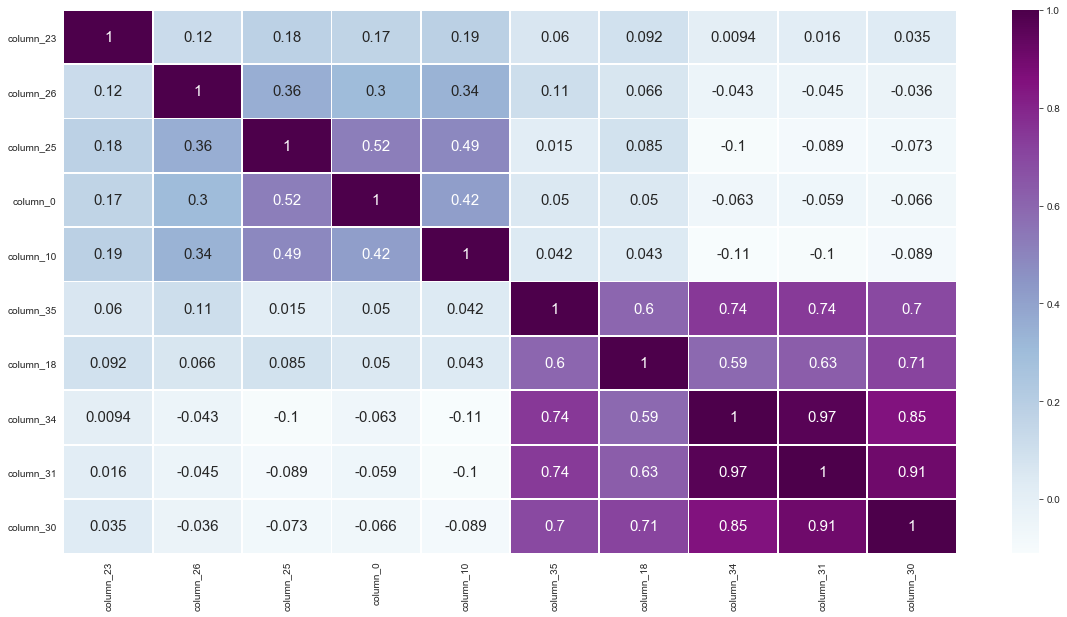

In [23]:
plt.subplots(figsize=(20,10)) 
# heatmap
sns.heatmap(CORR,
            annot=True,
            cmap="BuPu",
            linewidths=0.7,
            annot_kws={"size": 15})

# Plot aesthetics  
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [24]:
Data.describe()

,column_23,column_26,column_25,column_0,column_10,column_35,column_18,column_34,column_31,column_30
count,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000
mean,0.000403,0.000346,0.000317,0.000307,0.000302,0.000190,0.000186,0.000183,0.000176,0.000141
std,0.007114,0.003721,0.003085,0.003100,0.003657,0.001541,0.000916,0.001941,0.001618,0.000837
min,-0.098702,-0.063468,-0.047382,-0.044793,-0.048886,-0.015712,-0.014183,-0.011685,-0.011037,-0.006195
25%,-0.000772,-0.000591,-0.000346,-0.000489,-0.000556,-0.000521,-0.000183,-0.000897,-0.000705,-0.000287
50%,0.000433,0.000312,0.000411,0.000392,0.000488,0.000216,0.000187,0.000208,0.000192,0.000143
75%,0.001748,0.001312,0.001118,0.001284,0.001418,0.000962,0.000579,0.001281,0.001077,0.000559
max,0.106410,0.052540,0.038710,0.046088,0.048839,0.016720,0.019978,0.011812,0.010464,0.012710


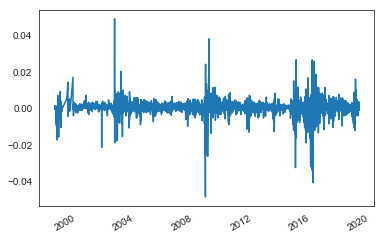

In [25]:
Data['column_10'].plot()

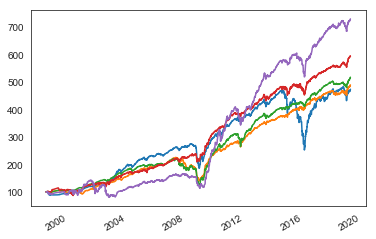

In [26]:
#MAX
DF['column_10'].plot()
DF['column_0'].plot()
DF['column_25'].plot()
DF['column_26'].plot()
DF['column_23'].plot()

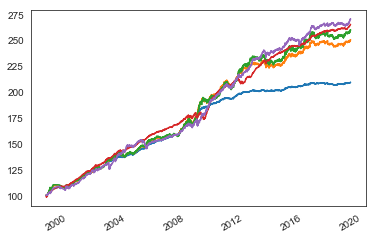

In [27]:
#Min
DF['column_30'].plot()
DF['column_31'].plot()
DF['column_34'].plot()
DF['column_18'].plot()
DF['column_35'].plot()

In [28]:
DFAI = DF['column_30'].copy()
DFAI = pd.DataFrame(DFAI)
DFAI.head()

,column_30
1998-06-30,100.000000
1998-07-01,100.033062
1998-07-02,100.051464
1998-07-03,100.033374
1998-07-06,100.145347


In [29]:
DFAI['Returns'] = np.log(DFAI/DFAI.shift())
DFAI.dropna(inplace=True)

In [30]:
#data = pd.read_csv('SPY.csv', index_col = 0, parse_dates = True)
#data = pd.DataFrame(data['Adj Close'])
#data['Returns'] = np.log(data/data.shift())


In [31]:
DFAI.head()

,column_30,Returns
1998-07-01,100.033062,0.000331
1998-07-02,100.051464,0.000184
1998-07-03,100.033374,-0.000181
1998-07-06,100.145347,0.001119
1998-07-07,100.103240,-0.000421


In [32]:
lags=6

In [ ]:
cols = []
for lag in range(1, lags +1):
    col = 'lag_{}'.format(lag)
    DFAI[col] = np.sign(DFAI['Returns'].shift(lag))
    cols.append(col)
DFAI.dropna(inplace=True)

In [45]:
model = SVC(gamma='scale')
model.fit(DFAI[cols], np.sign(DFAI['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
DFAI['Prediction'] = model.predict(DFAI[cols])
DFAI['Strategy'] = DFAI['Prediction'] * DFAI['Returns']

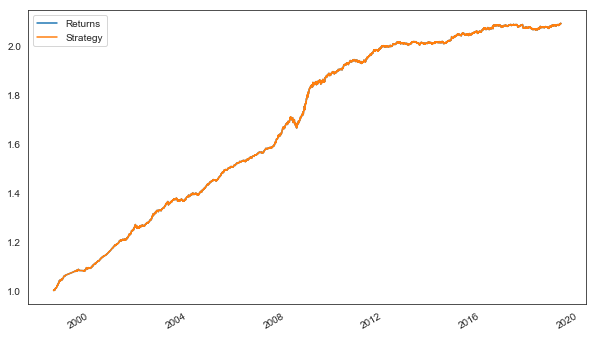

In [47]:
 DFAI[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))  
#DFAI['Strategy'].cumsum().apply(np.exp).plot(figsize=(10, 6))
#((1+DFAI['Strategy']).cumprod()-1).plot()

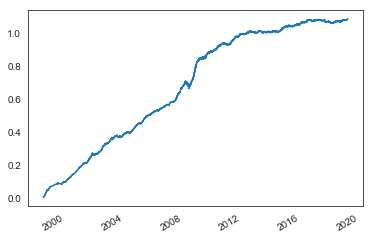

In [48]:
#DFAI['Strategy'].plot()
((1+DFAI['Strategy']).cumprod()-1).plot()

In [49]:
DFAI.head()

,column_30,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
1998-07-09,100.340288,0.002643,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,0.002643
1998-07-10,100.298493,-0.000417,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-0.000417
1998-07-13,100.337481,0.000389,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,0.000389
1998-07-14,100.479709,0.001416,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.001416
1998-07-15,100.334362,-0.001448,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.001448


In [50]:
SPY = pd.read_csv('SPX.csv')
#SPY.drop('Unnamed: 0', axis=1, inplace=True)

In [51]:
SPY.head()

,Date,Open,High,Low,Close
0,07/01/1998,1148.56,1148.56,1133.84,1148.56
1,09/01/1998,994.26,1000.71,939.98,994.26
2,10/01/1998,986.39,1017.01,981.25,986.39
3,12/01/1998,1175.28,1175.89,1150.31,1175.28
4,07/02/1998,1146.42,1148.56,1142.99,1146.42


In [52]:
#SPY["Close"]

SPY = pd.read_csv('SPX.csv')
#SPY = pd.DataFrame(SPY)
#SPX  = pd.to_datetime(raw_data['Date'].values, format='%d/%m/%Y')
SPY.index = SPY['Date']

In [53]:
#SPX = pd.to_datetime(raw_data['Date'].values, format='%d/%m/%Y')

In [56]:
SPY.head()

,Date,Open,High,Low,Close
Date,,,,,
07/01/1998,07/01/1998,1148.56,1148.56,1133.84,1148.56
09/01/1998,09/01/1998,994.26,1000.71,939.98,994.26
10/01/1998,10/01/1998,986.39,1017.01,981.25,986.39
12/01/1998,12/01/1998,1175.28,1175.89,1150.31,1175.28
07/02/1998,07/02/1998,1146.42,1148.56,1142.99,1146.42


In [59]:
from statsmodels.graphics.tsaplots import plot_acf

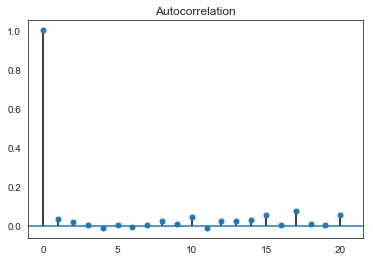

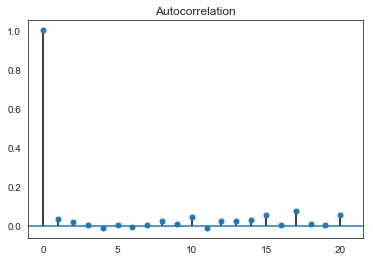

In [64]:

plot_acf(DFAI['Returns'], lags= 20, alpha=1)

In [68]:
#plot_acf(DF['column_30'], lags= 20, alpha=1)